In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import r2_score, mean_absolute_error, explained_variance_score

In [2]:
def evaluate_metrics(y_test, y_preds):
    r2 = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)
    evs = explained_variance_score(y_test, y_preds)

    print('r2 score is ', r2)
    print('mean absolute error is ', mae)
    print('explained variance score is ', evs)

In [3]:
X_train_df = pd.read_csv(r"C:\Users\91910\Desktop\IIT_Kanpur\Semester 6\MSE643A\Project\bandGap\X_train.csv")
y_train_df = pd.read_csv(r"C:\Users\91910\Desktop\IIT_Kanpur\Semester 6\MSE643A\Project\bandGap\y_train.csv")

X_test_df = pd.read_csv(r"C:\Users\91910\Desktop\IIT_Kanpur\Semester 6\MSE643A\Project\bandGap\X_test.csv")
y_test_df = pd.read_csv(r"C:\Users\91910\Desktop\IIT_Kanpur\Semester 6\MSE643A\Project\bandGap\y_test.csv")
    

print(X_train_df.shape)
print(y_train_df.shape)
print(X_test_df.shape)
y_test_df.shape

(739, 32)
(739, 2)
(317, 32)


(317, 2)

In [4]:
X_train_df.drop('Unnamed: 0', inplace=True, axis= 1)
y_train_df.drop('Unnamed: 0', inplace=True, axis= 1)
X_test_df.drop('Unnamed: 0', inplace=True, axis= 1)
y_test_df.drop('Unnamed: 0', inplace= True, axis= 1)

X_train_df

,nsites,space_group,volume,n,poly_electronic,poly_total,pot_ferroelectric,e_e_0,e_e_1,e_e_2,...,e_t_5,e_t_6,e_t_7,e_t_8,len_a,len_b,len_c,angl_alpha,angl_beta,angl_gamma
0,4,36,145.521118,3.02,9.10,12.48,0,9.092807,-0.128835,0.000640,...,-1.448878e-02,-8.631280e-03,-1.642273e-02,12.848129,4.675752,4.675752,7.636903,90.000000,90.000000,60.642441
1,9,162,125.649892,2.28,5.20,14.44,1,5.282135,-0.000118,0.000567,...,6.849700e-02,3.954515e-02,6.849926e-02,14.939830,5.358452,5.358452,5.052976,89.997369,89.997368,119.998719
2,4,129,92.406572,2.19,4.80,11.57,0,5.116323,0.000003,0.000028,...,9.887800e-04,9.782000e-04,9.881500e-04,4.847717,3.913750,3.913750,6.032769,90.000000,90.000000,90.000000
3,4,71,176.931872,1.73,3.00,5.86,0,2.945779,0.030535,-0.025786,...,-2.152550e-01,4.525042e-02,-2.152684e-01,5.758591,5.286060,6.420287,6.420287,69.888581,65.690306,65.690305
4,2,225,55.005179,1.67,2.80,8.88,0,2.798744,0.000001,-0.000001,...,1.452000e-04,2.005900e-04,1.452000e-04,8.878139,4.268803,4.268804,4.268804,60.000000,59.999995,60.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,8,194,353.715043,2.84,8.09,13.83,0,7.718620,-0.000011,-0.000034,...,-1.217060e-03,-2.653100e-04,-1.092290e-03,14.939210,6.127727,6.127727,10.877375,90.000000,90.000000,120.000005
735,4,166,54.633956,2.15,4.62,10.55,1,4.970524,0.000000,0.000000,...,4.730000e-06,-1.000000e-08,4.730000e-06,8.637382,6.529411,6.529411,6.529411,28.121970,28.121970,28.121968
736,5,217,87.578887,1.28,1.63,2.17,0,1.630283,0.000035,0.000021,...,-1.544160e-03,-2.505900e-04,-1.514870e-03,2.168502,4.845521,4.845520,4.845520,109.471215,109.471213,109.471224
737,4,166,139.017820,2.26,5.12,13.09,1,5.473830,-0.056863,-0.338594,...,-1.057886e+00,-1.743245e+00,-1.057886e+00,9.109768,8.403218,8.403219,8.403218,30.925733,30.925731,30.925728


In [5]:
y_train = np.array(y_train_df['band_gap'])
y_test = np.array(y_test_df['band_gap'])

print(y_train.shape)
print(y_test.shape)

y_train

(739,)
(317,)


array([0.62, 0.52, 0.99, 1.71, 2.92, 0.86, 2.57, 1.56, 2.07, 1.92, 2.67,
       1.21, 3.6 , 0.49, 0.91, 1.92, 3.07, 2.37, 2.86, 3.74, 5.15, 1.09,
       3.85, 2.02, 2.08, 1.26, 1.37, 4.22, 4.07, 2.33, 1.68, 1.88, 4.88,
       5.5 , 1.26, 0.98, 4.77, 2.05, 0.4 , 3.12, 1.25, 0.66, 2.82, 0.77,
       4.06, 2.01, 1.79, 2.21, 5.38, 1.71, 3.65, 1.95, 2.78, 1.03, 2.17,
       3.37, 1.04, 0.37, 3.72, 2.17, 1.57, 0.85, 0.83, 0.24, 0.11, 0.51,
       1.14, 1.92, 0.56, 0.68, 0.18, 4.71, 0.34, 4.32, 1.19, 4.98, 3.15,
       0.71, 0.36, 2.1 , 5.07, 1.13, 1.1 , 2.02, 2.1 , 1.69, 0.95, 3.74,
       6.23, 0.39, 0.55, 0.26, 2.03, 1.88, 0.32, 0.97, 0.43, 5.22, 1.02,
       2.31, 1.14, 0.38, 0.6 , 4.44, 5.78, 3.76, 1.38, 1.67, 3.3 , 1.53,
       2.44, 4.25, 3.62, 2.99, 2.13, 1.93, 2.5 , 0.28, 0.43, 1.52, 1.24,
       2.07, 1.12, 1.38, 3.06, 0.78, 1.32, 1.37, 0.83, 5.44, 1.25, 0.86,
       0.87, 2.96, 1.98, 1.28, 1.14, 2.69, 4.68, 5.73, 1.26, 2.14, 7.23,
       2.85, 2.75, 0.71, 5.62, 3.15, 0.66, 2.23, 4.

In [6]:
X_train_withoutBoolVals_df = X_train_df.drop('pot_ferroelectric', axis= 1)
X_test_withoutBoolVals_df = X_test_df.drop('pot_ferroelectric', axis= 1)

X_train_withoutBoolVals_df

,nsites,space_group,volume,n,poly_electronic,poly_total,e_e_0,e_e_1,e_e_2,e_e_3,...,e_t_5,e_t_6,e_t_7,e_t_8,len_a,len_b,len_c,angl_alpha,angl_beta,angl_gamma
0,4,36,145.521118,3.02,9.10,12.48,9.092807,-0.128835,0.000640,-1.288473e-01,...,-1.448878e-02,-8.631280e-03,-1.642273e-02,12.848129,4.675752,4.675752,7.636903,90.000000,90.000000,60.642441
1,9,162,125.649892,2.28,5.20,14.44,5.282135,-0.000118,0.000567,-1.179800e-04,...,6.849700e-02,3.954515e-02,6.849926e-02,14.939830,5.358452,5.358452,5.052976,89.997369,89.997368,119.998719
2,4,129,92.406572,2.19,4.80,11.57,5.116323,0.000003,0.000028,2.440000e-06,...,9.887800e-04,9.782000e-04,9.881500e-04,4.847717,3.913750,3.913750,6.032769,90.000000,90.000000,90.000000
3,4,71,176.931872,1.73,3.00,5.86,2.945779,0.030535,-0.025786,3.052938e-02,...,-2.152550e-01,4.525042e-02,-2.152684e-01,5.758591,5.286060,6.420287,6.420287,69.888581,65.690306,65.690305
4,2,225,55.005179,1.67,2.80,8.88,2.798744,0.000001,-0.000001,-1.700000e-07,...,1.452000e-04,2.005900e-04,1.452000e-04,8.878139,4.268803,4.268804,4.268804,60.000000,59.999995,60.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,8,194,353.715043,2.84,8.09,13.83,7.718620,-0.000011,-0.000034,2.083000e-05,...,-1.217060e-03,-2.653100e-04,-1.092290e-03,14.939210,6.127727,6.127727,10.877375,90.000000,90.000000,120.000005
735,4,166,54.633956,2.15,4.62,10.55,4.970524,0.000000,0.000000,0.000000e+00,...,4.730000e-06,-1.000000e-08,4.730000e-06,8.637382,6.529411,6.529411,6.529411,28.121970,28.121970,28.121968
736,5,217,87.578887,1.28,1.63,2.17,1.630283,0.000035,0.000021,-3.504000e-05,...,-1.544160e-03,-2.505900e-04,-1.514870e-03,2.168502,4.845521,4.845520,4.845520,109.471215,109.471213,109.471224
737,4,166,139.017820,2.26,5.12,13.09,5.473830,-0.056863,-0.338594,-5.686262e-02,...,-1.057886e+00,-1.743245e+00,-1.057886e+00,9.109768,8.403218,8.403219,8.403218,30.925733,30.925731,30.925728


In [9]:
scaler = MinMaxScaler()
scaled_X_train_withoutBoolVals = scaler.fit_transform(X_train_withoutBoolVals_df)
scaled_X_test_withoutBoolVals = scaler.fit_transform(X_test_withoutBoolVals_df)

scaled_X_train_withoutBoolVals_df = pd.DataFrame(scaled_X_train_withoutBoolVals, columns= X_train_withoutBoolVals_df.columns)
scaled_X_test_withoutBoolVals_df = pd.DataFrame(scaled_X_test_withoutBoolVals, columns= X_test_withoutBoolVals_df.columns)

scaled_X_train_withoutBoolVals_df

,nsites,space_group,volume,n,poly_electronic,poly_total,e_e_0,e_e_1,e_e_2,e_e_3,...,e_t_5,e_t_6,e_t_7,e_t_8,len_a,len_b,len_c,angl_alpha,angl_beta,angl_gamma
0,0.111111,0.153509,0.225488,0.130827,0.035406,0.040429,0.035371,0.438235,0.655033,0.438229,...,0.496899,0.366380,0.496566,0.047999,0.161391,0.161391,0.171378,0.568965,0.568965,0.351628
1,0.388889,0.706140,0.191424,0.075188,0.016921,0.048049,0.017309,0.485900,0.655012,0.485899,...,0.511171,0.372184,0.511171,0.057061,0.212323,0.212323,0.081607,0.568946,0.568946,0.798140
2,0.111111,0.561404,0.134438,0.068421,0.015025,0.036892,0.016523,0.485945,0.654858,0.485943,...,0.499561,0.367537,0.499561,0.013339,0.104543,0.104543,0.115647,0.568965,0.568965,0.572472
3,0.111111,0.307018,0.279332,0.033835,0.006494,0.014694,0.006235,0.497251,0.647500,0.497248,...,0.462373,0.372872,0.462370,0.017286,0.206922,0.291539,0.129110,0.418602,0.387214,0.389601
4,0.000000,0.982456,0.070325,0.029323,0.005546,0.026434,0.005538,0.485944,0.654850,0.485942,...,0.499416,0.367444,0.499416,0.030800,0.131031,0.131031,0.054363,0.344670,0.344670,0.346795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,0.333333,0.846491,0.582375,0.117293,0.030619,0.045677,0.028858,0.485940,0.654841,0.485950,...,0.499182,0.367388,0.499203,0.057058,0.269713,0.269713,0.283959,0.568965,0.568965,0.798150
735,0.111111,0.723684,0.069688,0.065414,0.014172,0.032926,0.015832,0.485944,0.654850,0.485942,...,0.499392,0.367420,0.499392,0.029757,0.299680,0.299680,0.132902,0.106334,0.106334,0.106990
736,0.166667,0.947368,0.126163,0.000000,0.000000,0.000350,0.000000,0.485957,0.654856,0.485929,...,0.499125,0.367389,0.499130,0.001732,0.174056,0.174056,0.074400,0.714542,0.714542,0.718946
737,0.111111,0.723684,0.214340,0.073684,0.016542,0.042800,0.018218,0.464887,0.558328,0.464885,...,0.317461,0.157373,0.317461,0.031804,0.439472,0.439472,0.198002,0.127297,0.127296,0.128081


In [10]:
scaled_y_train = scaler.fit_transform(y_train_df)[:, 0]
scaled_y_test = scaler.fit_transform(y_test_df)[:, 0]

print(scaled_y_train.shape)
print(scaled_y_test.shape)

scaled_y_train

(739,)
(317,)


array([0.06390977, 0.05137845, 0.11027569, 0.20050125, 0.35213033,
       0.09398496, 0.30827068, 0.18170426, 0.24561404, 0.22681704,
       0.32080201, 0.13784461, 0.43734336, 0.04761905, 0.10025063,
       0.22681704, 0.37092732, 0.28320802, 0.34461153, 0.45488722,
       0.63157895, 0.12280702, 0.46867168, 0.23934837, 0.24686717,
       0.14411028, 0.15789474, 0.51503759, 0.4962406 , 0.27819549,
       0.19674185, 0.22180451, 0.59774436, 0.6754386 , 0.14411028,
       0.10902256, 0.5839599 , 0.24310777, 0.03634085, 0.37719298,
       0.14285714, 0.06892231, 0.339599  , 0.08270677, 0.49498747,
       0.23809524, 0.21052632, 0.26315789, 0.660401  , 0.20050125,
       0.44360902, 0.23057644, 0.33458647, 0.11528822, 0.25814536,
       0.4085213 , 0.11654135, 0.03258145, 0.45238095, 0.25814536,
       0.18295739, 0.09273183, 0.09022556, 0.01629073, 0.        ,
       0.05012531, 0.12907268, 0.22681704, 0.05639098, 0.07142857,
       0.00877193, 0.5764411 , 0.02882206, 0.52756892, 0.13533

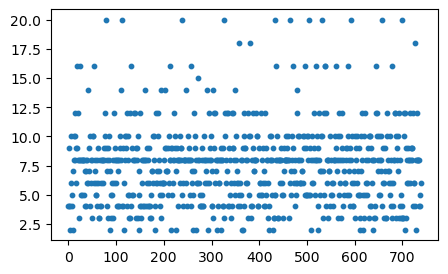

In [11]:
#comparing scaled data with original one for one column on the train dataset and for the test dataset

x = [i for i in range(len(X_train_df))]

plt.figure(figsize=(5,3))

plt.scatter(x, X_train_df['nsites'], s= 10.0)

plt.show()

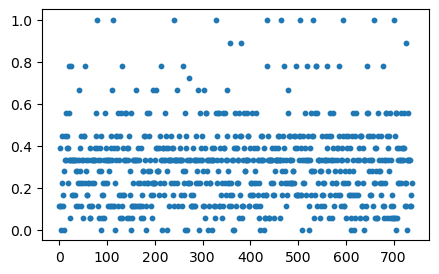

In [12]:
plt.figure(figsize=(5,3))

plt.scatter(x, scaled_X_train_withoutBoolVals_df['nsites'], s= 10.0)

plt.show()

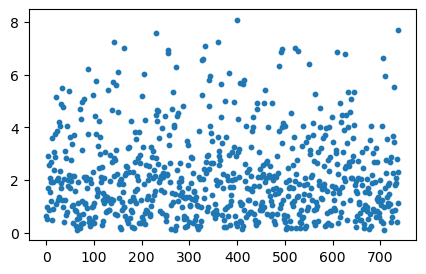

In [13]:
plt.figure(figsize=(5,3))

plt.scatter(x, y_train_df['band_gap'], s=10.0)

plt.show()

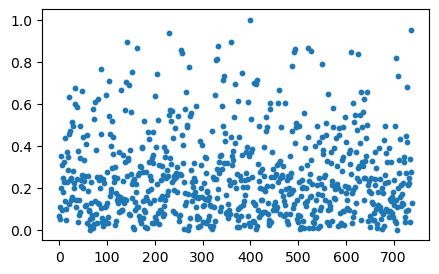

In [14]:
plt.figure(figsize=(5, 3))

plt.scatter(x, scaled_y_train, s= 10.0)

plt.show()

In [16]:
scaled_X_train_df = scaled_X_train_withoutBoolVals_df.copy()
scaled_X_test_df = scaled_X_test_withoutBoolVals_df.copy()

scaled_X_train_df['pot_ferroelectric'] = X_train_df['pot_ferroelectric']
scaled_X_test_df['pot_ferroelectric'] = X_test_df['pot_ferroelectric']

scaled_X_train_df

,nsites,space_group,volume,n,poly_electronic,poly_total,e_e_0,e_e_1,e_e_2,e_e_3,...,e_t_6,e_t_7,e_t_8,len_a,len_b,len_c,angl_alpha,angl_beta,angl_gamma,pot_ferroelectric
0,0.111111,0.153509,0.225488,0.130827,0.035406,0.040429,0.035371,0.438235,0.655033,0.438229,...,0.366380,0.496566,0.047999,0.161391,0.161391,0.171378,0.568965,0.568965,0.351628,0
1,0.388889,0.706140,0.191424,0.075188,0.016921,0.048049,0.017309,0.485900,0.655012,0.485899,...,0.372184,0.511171,0.057061,0.212323,0.212323,0.081607,0.568946,0.568946,0.798140,1
2,0.111111,0.561404,0.134438,0.068421,0.015025,0.036892,0.016523,0.485945,0.654858,0.485943,...,0.367537,0.499561,0.013339,0.104543,0.104543,0.115647,0.568965,0.568965,0.572472,0
3,0.111111,0.307018,0.279332,0.033835,0.006494,0.014694,0.006235,0.497251,0.647500,0.497248,...,0.372872,0.462370,0.017286,0.206922,0.291539,0.129110,0.418602,0.387214,0.389601,0
4,0.000000,0.982456,0.070325,0.029323,0.005546,0.026434,0.005538,0.485944,0.654850,0.485942,...,0.367444,0.499416,0.030800,0.131031,0.131031,0.054363,0.344670,0.344670,0.346795,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,0.333333,0.846491,0.582375,0.117293,0.030619,0.045677,0.028858,0.485940,0.654841,0.485950,...,0.367388,0.499203,0.057058,0.269713,0.269713,0.283959,0.568965,0.568965,0.798150,0
735,0.111111,0.723684,0.069688,0.065414,0.014172,0.032926,0.015832,0.485944,0.654850,0.485942,...,0.367420,0.499392,0.029757,0.299680,0.299680,0.132902,0.106334,0.106334,0.106990,1
736,0.166667,0.947368,0.126163,0.000000,0.000000,0.000350,0.000000,0.485957,0.654856,0.485929,...,0.367389,0.499130,0.001732,0.174056,0.174056,0.074400,0.714542,0.714542,0.718946,0
737,0.111111,0.723684,0.214340,0.073684,0.016542,0.042800,0.018218,0.464887,0.558328,0.464885,...,0.157373,0.317461,0.031804,0.439472,0.439472,0.198002,0.127297,0.127296,0.128081,1


In [141]:
regr1 = svm.SVR()
regr1.fit(scaled_X_train_df, scaled_y_train)
y_preds1 = regr1.predict(scaled_X_test_df)

evaluate_metrics(scaled_y_test, y_preds1)

r2 score is  0.45948515297754455
mean absolute error is  0.11318802983167398
explained variance score is  0.5048279312564211


In [204]:
regr2 = DecisionTreeRegressor()
regr2.fit(scaled_X_train_df, scaled_y_train)
y_preds2 = regr2.predict(scaled_X_test_df)

evaluate_metrics(scaled_y_test, y_preds2)

r2 score is  0.24963574372356578
mean absolute error is  0.12118375221223156
explained variance score is  0.24965542966007592


In [206]:
regr3 = RandomForestRegressor()
regr3.fit(scaled_X_train_df, scaled_y_train)
y_preds3 = regr3.predict(scaled_X_test_df)

evaluate_metrics(scaled_y_test, y_preds3)

r2 score is  0.5777029874221703
mean absolute error is  0.09127264131041167
explained variance score is  0.621297918739319


In [207]:
regr4 = KNeighborsRegressor()
regr4.fit(scaled_X_train_df, scaled_y_train)
y_preds4 = regr4.predict(scaled_X_test_df)

evaluate_metrics(scaled_y_test, y_preds4)

r2 score is  0.3499761019793589
mean absolute error is  0.1120851826596735
explained variance score is  0.35907161947347477


In [208]:
regr5 = Ridge()
regr5.fit(scaled_X_train_df, scaled_y_train)
y_preds5 = regr5.predict(scaled_X_test_df)

evaluate_metrics(scaled_y_test, y_preds5)

r2 score is  0.3829449361417132
mean absolute error is  0.12078607795164588
explained variance score is  0.40900194412717794


In [209]:
regr6 = Lasso()
regr6.fit(scaled_X_train_df, scaled_y_train)
y_preds6 = regr6.predict(scaled_X_test_df)

evaluate_metrics(scaled_y_test, y_preds6)

r2 score is  -0.017961916361126873
mean absolute error is  0.15634958651800754
explained variance score is  0.0


In [210]:
regr7 = GaussianProcessRegressor()
regr7.fit(scaled_X_train_df, scaled_y_train)
y_preds7 = regr7.predict(scaled_X_test_df)

evaluate_metrics(scaled_y_test, y_preds7)

r2 score is  -266517.39314377395
mean absolute error is  77.28249694783884
explained variance score is  -266517.07521986804


In [211]:
regr8 = GradientBoostingRegressor()
regr8.fit(scaled_X_train_df, scaled_y_train)
y_preds8 = regr8.predict(scaled_X_test_df)

evaluate_metrics(scaled_y_test, y_preds8)

r2 score is  0.540446755128769
mean absolute error is  0.09198331196823874
explained variance score is  0.5895833179069287


In [21]:
#standardizing data features
scaler2 = StandardScaler()
standardized_X_train = scaler2.fit_transform(X_train_withoutBoolVals_df)
standardized_X_test = scaler2.fit_transform(X_test_withoutBoolVals_df)

standardized_X_train_df = pd.DataFrame(standardized_X_train, columns=X_train_withoutBoolVals_df.columns)
standardized_X_train_df['pot_ferroelectric'] = X_train_df['pot_ferroelectric']
standardized_X_test_df = pd.DataFrame(standardized_X_test, columns=X_test_withoutBoolVals_df.columns)
standardized_X_test_df['pot_ferroelectric'] = X_test_df['pot_ferroelectric']

standardized_X_train_df

,nsites,space_group,volume,n,poly_electronic,poly_total,e_e_0,e_e_1,e_e_2,e_e_3,...,e_t_6,e_t_7,e_t_8,len_a,len_b,len_c,angl_alpha,angl_beta,angl_gamma,pot_ferroelectric
0,-1.036277,-1.609201,-0.212833,0.584859,0.199161,-0.120952,0.145676,-1.075392,0.057398,-1.073317,...,0.086701,0.073913,-0.040526,-0.416221,-0.589132,0.222959,0.344141,0.363072,-0.932127,0
1,0.438133,0.274455,-0.413661,-0.112772,-0.151391,-0.020650,-0.157823,0.006775,0.057079,0.008314,...,0.170811,0.252811,0.074756,0.017321,-0.165218,-0.734604,0.344026,0.362956,1.300846,1
2,-1.036277,-0.218884,-0.749633,-0.197619,-0.187346,-0.167520,-0.171029,0.007788,0.054706,0.009325,...,0.103478,0.110591,-0.481460,-0.900123,-1.062288,-0.371508,0.344141,0.363072,0.172299,0
3,-1.036277,-1.085964,0.104619,-0.631281,-0.349139,-0.459725,-0.343901,0.264485,-0.058808,0.265824,...,0.180772,-0.344977,-0.431258,-0.028651,0.494115,-0.227900,-0.536175,-0.709007,-0.742227,0
4,-1.626042,1.216282,-1.127630,-0.687846,-0.367116,-0.305179,-0.355612,0.007778,0.054578,0.009303,...,0.102120,0.108815,-0.259328,-0.674650,-0.841821,-1.025206,-0.969018,-0.959955,-0.956295,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,0.143251,0.752843,1.891273,0.415165,0.108377,-0.051867,0.036229,0.007672,0.054434,0.009480,...,0.101307,0.106208,0.074722,0.505842,0.312453,1.423828,0.344141,0.363072,1.300894,0
735,-1.036277,0.334253,-1.131381,-0.235329,-0.203525,-0.219718,-0.182642,0.007767,0.054585,0.009305,...,0.101770,0.108519,-0.272597,0.760928,0.561874,-0.187460,-2.364382,-2.365805,-2.155542,1
736,-0.741395,1.096685,-0.798424,-1.055516,-0.472282,-0.648557,-0.448673,0.008063,0.054677,0.009010,...,0.101332,0.105318,-0.629123,-0.308411,-0.483717,-0.811484,1.196434,1.221770,0.904803,0
737,-1.036277,0.334253,-0.278558,-0.131627,-0.158582,-0.089736,-0.142556,-0.470297,-1.434334,-0.468476,...,-2.941748,-2.120043,-0.246562,1.950871,1.725392,0.506944,-2.241655,-2.242156,-2.050065,1


In [22]:
y_train_df

,band_gap
0,0.62
1,0.52
2,0.99
3,1.71
4,2.92
...,...
734,0.39
735,2.80
736,7.72
737,2.32


In [28]:
standardized_y_train = scaler2.fit_transform(y_train_df)[:, 0]
standardized_y_test = scaler2.fit_transform(y_test_df)[:, 0]

print(standardized_y_train.shape)

standardized_y_train

(739,)


array([-9.61877380e-01, -1.02410620e+00, -7.31630740e-01, -2.83583224e-01,
        4.69385518e-01, -8.12528208e-01,  2.51584642e-01, -3.76926456e-01,
       -5.95594662e-02, -1.52902699e-01,  3.13813464e-01, -5.94727332e-01,
        8.92541505e-01, -1.04277485e+00, -7.81413797e-01, -1.52902699e-01,
        5.62728750e-01,  1.27126999e-01,  4.32048225e-01,  9.79661855e-01,
        1.85708824e+00, -6.69401918e-01,  1.04811356e+00, -9.06738770e-02,
       -5.33365841e-02, -5.63612921e-01, -4.95161218e-01,  1.27836020e+00,
        1.18501697e+00,  1.02235470e-01, -3.02251871e-01, -1.77794227e-01,
        1.68907042e+00,  2.07488912e+00, -5.63612921e-01, -7.37853622e-01,
        1.62061872e+00, -7.20052305e-02, -1.09878079e+00,  5.93843161e-01,
       -5.69835804e-01, -9.36985851e-01,  4.07156696e-01, -8.68534147e-01,
        1.17879408e+00, -9.68967592e-02, -2.33800167e-01,  2.75608841e-02,
        2.00021453e+00, -2.83583224e-01,  9.23655915e-01, -1.34234052e-01,
        3.82265167e-01, -

In [29]:
regr1 = svm.SVR()
regr1.fit(standardized_X_train_df, standardized_y_train)
y_preds9 = regr1.predict(standardized_X_test_df)

evaluate_metrics(standardized_y_test, y_preds9)

r2 score is  0.5810389004913774
mean absolute error is  0.44788985109561585
explained variance score is  0.5823299967807865


In [36]:
regr2 = DecisionTreeRegressor()
regr2.fit(standardized_X_train_df, standardized_y_train)
y_preds10 = regr2.predict(standardized_X_test_df)

evaluate_metrics(standardized_y_test, y_preds10)

r2 score is  -0.1178120954579569
mean absolute error is  0.7913159162151858
explained variance score is  -0.04601140160905959


In [38]:
regr3 = RandomForestRegressor()
regr3.fit(standardized_X_train_df, standardized_y_train)
y_preds11 = regr3.predict(standardized_X_test_df)

evaluate_metrics(standardized_y_test, y_preds11)

r2 score is  0.5611712271761067
mean absolute error is  0.47070806102911417
explained variance score is  0.563504644687912


In [39]:
regr4 = KNeighborsRegressor()
regr4.fit(standardized_X_train_df, standardized_y_train)
y_preds12 = regr4.predict(standardized_X_test_df)

evaluate_metrics(standardized_y_test, y_preds12)

r2 score is  0.4977196269991022
mean absolute error is  0.4828575614775578
explained variance score is  0.4978315070164253


In [40]:
regr5 = Ridge()
regr5.fit(standardized_X_train_df, standardized_y_train)
y_preds13 = regr5.predict(standardized_X_test_df)

evaluate_metrics(standardized_y_test, y_preds13)

r2 score is  0.4944964513549175
mean absolute error is  0.5254466557301192
explained variance score is  0.4945044608896422


In [41]:
regr6 = Lasso()
regr6.fit(standardized_X_train_df, standardized_y_train)
y_preds14 = regr6.predict(standardized_X_test_df)

evaluate_metrics(standardized_y_test, y_preds14)

r2 score is  0.0
mean absolute error is  0.7669698609952831
explained variance score is  0.0


In [42]:
regr7 = GaussianProcessRegressor()
regr7.fit(standardized_X_train_df, standardized_y_train)
y_preds15 = regr7.predict(standardized_X_test_df)

evaluate_metrics(standardized_y_test, y_preds15)

r2 score is  -4.896798378040766
mean absolute error is  1.3058008616406158
explained variance score is  -4.8664233428203865


In [43]:
regr8 = GradientBoostingRegressor()
regr8.fit(standardized_X_train_df, standardized_y_train)
y_preds16 = regr8.predict(standardized_X_test_df)

evaluate_metrics(standardized_y_test, y_preds16)

r2 score is  0.5356769909625849
mean absolute error is  0.4784514264778805
explained variance score is  0.5372112216516516
